<a href="https://colab.research.google.com/github/Diljot-Singh/ML-practice-projects/blob/Diljot/MinimizingChurnInSubscription/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#### Importing Libraries and Data ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

dataset = pd.read_csv('churn_data.csv') # Users who were 60 days enrolled, churn in the next 30


In [16]:
#### EDA ####


dataset.head(5) # Viewing the Data
dataset.columns
dataset.describe() # Distribution of Numerical Variables

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [17]:
# Cleaning Data

# Removing NaN
dataset.isna().any()
dataset.isna().sum()
dataset = dataset[pd.notnull(dataset['age'])]
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])


In [18]:
dataset.describe()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
count,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.00000,26996.000000,26996.000000,26996.000000
mean,35418.535302,0.413913,32.219921,3.342051,0.307045,28.066677,3.273967,0.073789,92.639502,0.050637,0.013113,8.199067,0.952511,0.606164,0.561824,0.393984,0.587235,0.420988,0.001296,0.018818,0.018188,0.004890,0.17347,0.018077,0.907819,0.318010
std,20319.620354,0.492542,9.964838,9.131992,1.055488,42.221432,8.953651,0.437331,88.868773,0.871431,0.238175,12.497770,0.212685,0.488608,0.496172,0.488640,0.492340,0.912884,0.035984,0.135883,0.133633,0.069756,0.37866,0.133232,0.751991,0.465712
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,17808.750000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.000000
50%,35745.500000,0.000000,30.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.780000,0.000000
75%,53236.750000,1.000000,37.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000


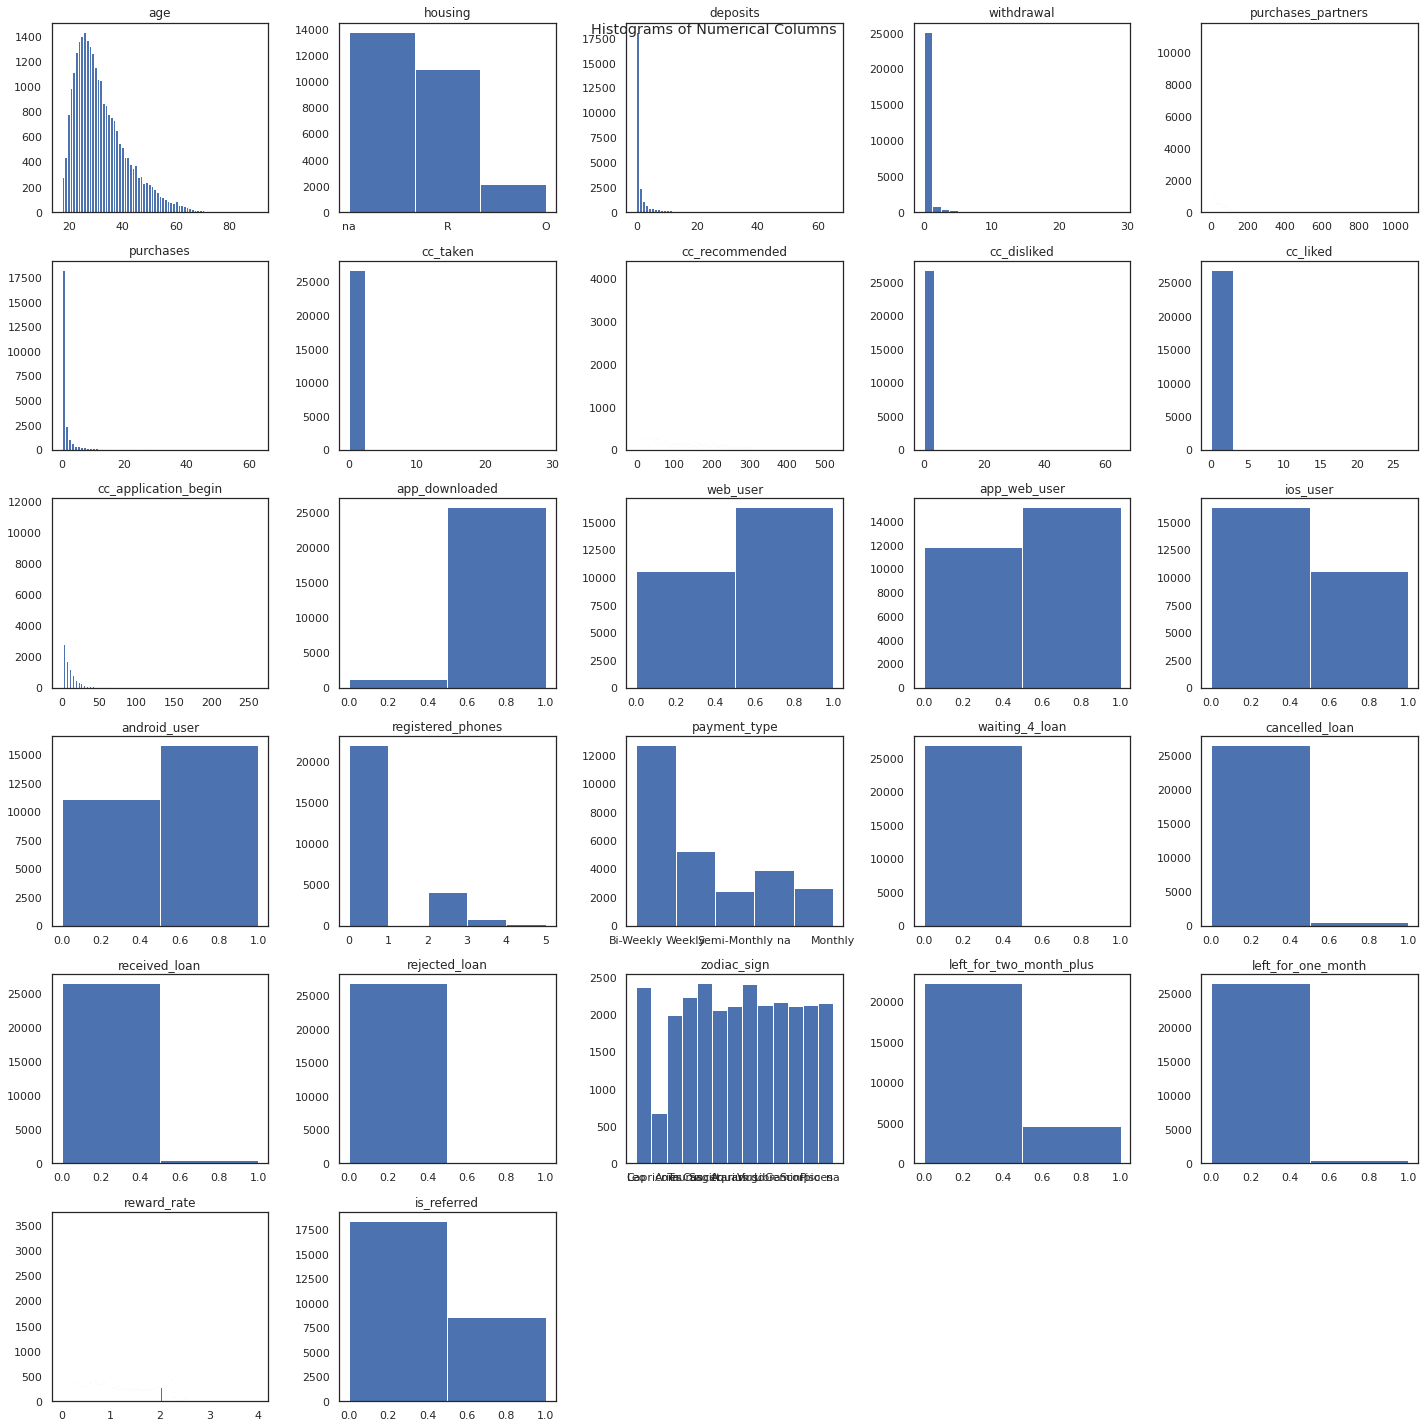

In [19]:
## Histograms
dataset.head()

dataset2= dataset.drop(columns = ['user','churn'])

fig = plt.figure(figsize=(20,20))
plt.suptitle("Histograms of Numerical Columns")
for i in range(len(dataset2.columns.values)):
  f= plt.subplot(6,5,i+1)
  f.set_title(dataset2.columns.values[i])
  vals = np.size(dataset2.iloc[:,i].unique())

  plt.hist(dataset2.iloc[:,i],bins = vals)
plt.tight_layout()


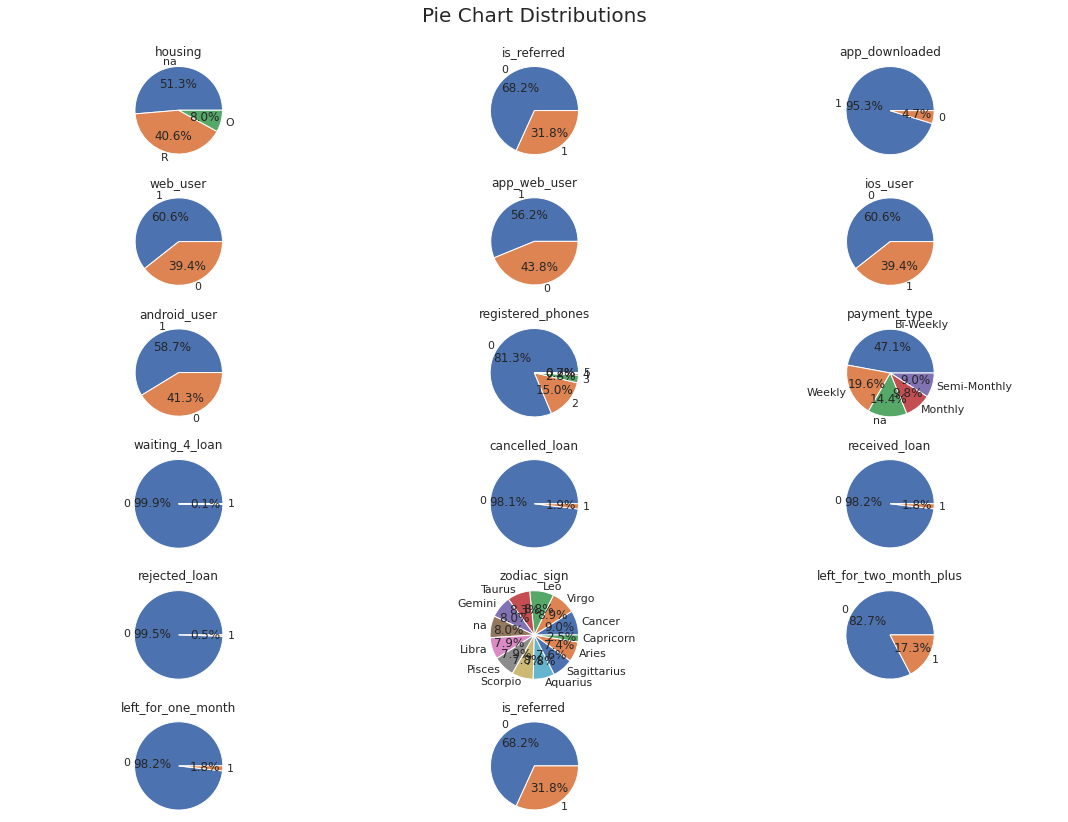

In [20]:
## Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
                    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


In [21]:
## Exploring Uneven Features
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()
dataset[dataset2.cancelled_loan == 1].churn.value_counts()
dataset[dataset2.received_loan == 1].churn.value_counts()
dataset[dataset2.rejected_loan == 1].churn.value_counts()
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

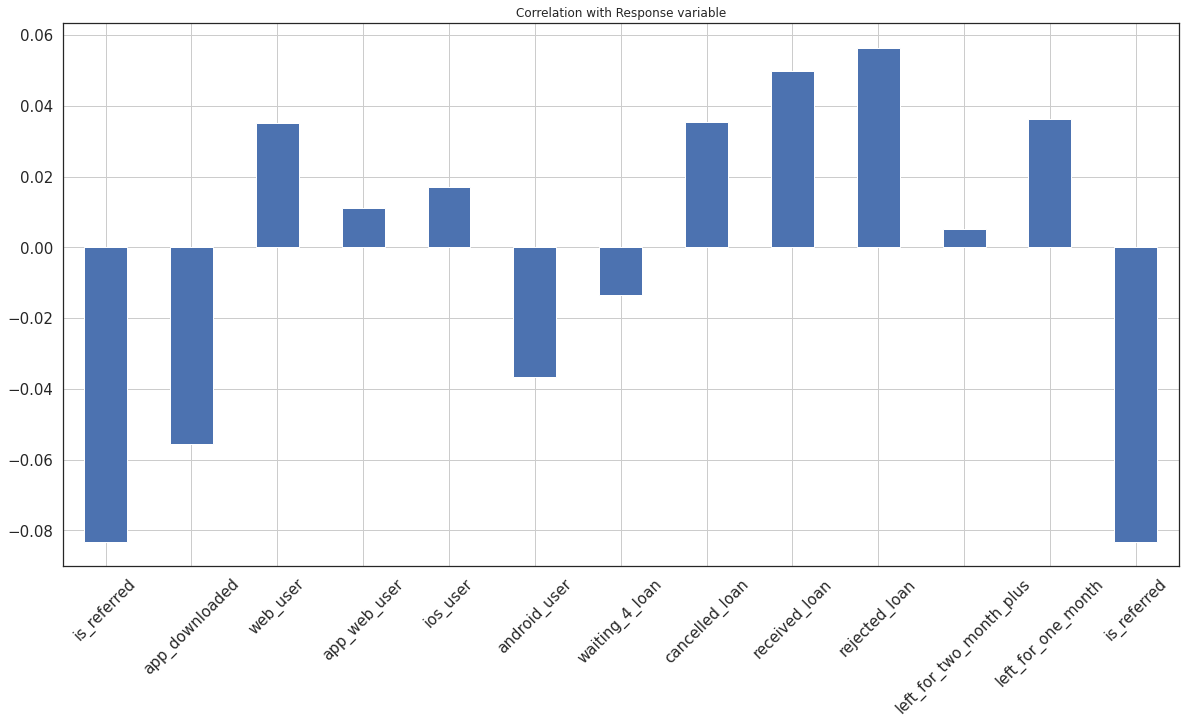

In [22]:
## Correlation with Response Variable
dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

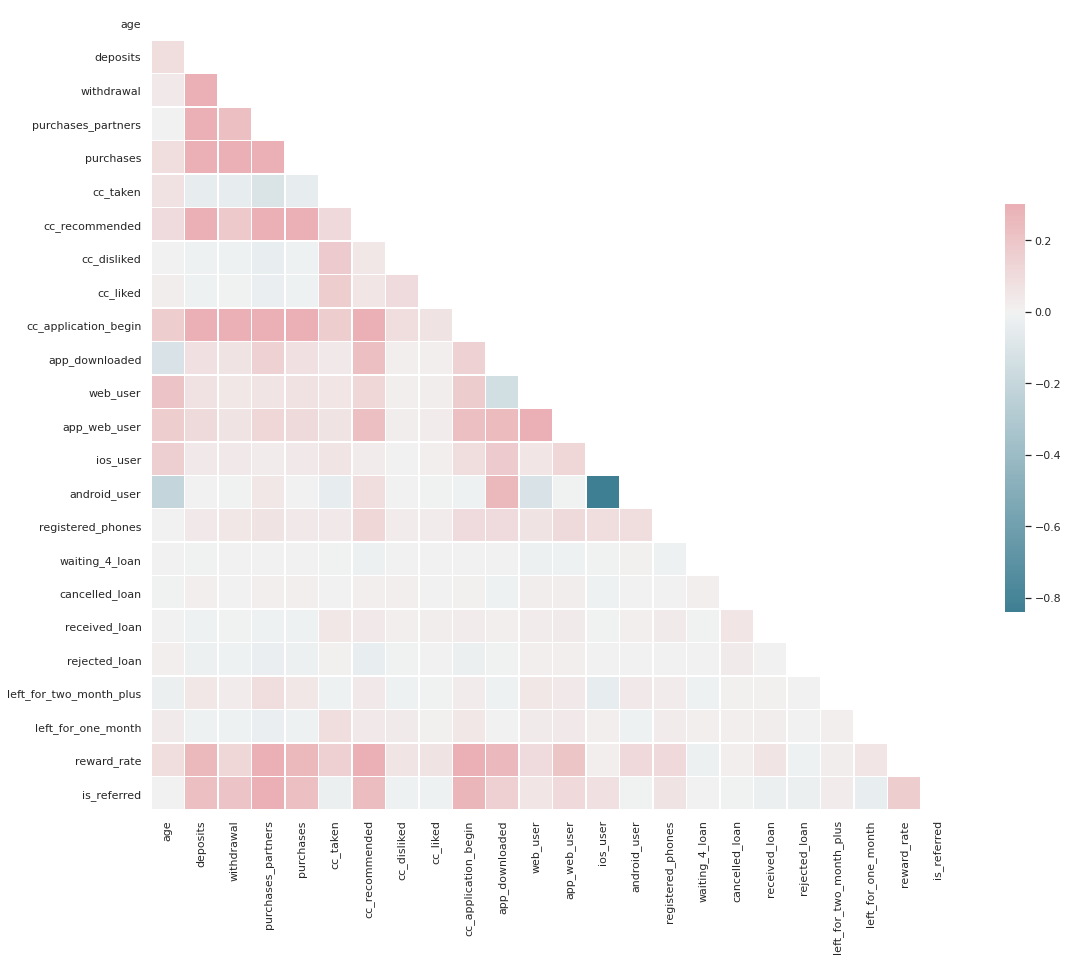

In [23]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Removing Correlated Fields
dataset = dataset.drop(columns = ['app_web_user'])

## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.

In [24]:
dataset.describe()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
count,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.00000,26996.000000,26996.000000,26996.000000
mean,35418.535302,0.413913,32.219921,3.342051,0.307045,28.066677,3.273967,0.073789,92.639502,0.050637,0.013113,8.199067,0.952511,0.606164,0.393984,0.587235,0.420988,0.001296,0.018818,0.018188,0.004890,0.17347,0.018077,0.907819,0.318010
std,20319.620354,0.492542,9.964838,9.131992,1.055488,42.221432,8.953651,0.437331,88.868773,0.871431,0.238175,12.497770,0.212685,0.488608,0.488640,0.492340,0.912884,0.035984,0.135883,0.133633,0.069756,0.37866,0.133232,0.751991,0.465712
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,17808.750000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.000000
50%,35745.500000,0.000000,30.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.780000,0.000000
75%,53236.750000,1.000000,37.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000


In [25]:
dataset.to_csv('new_churn_data.csv', index = False)
